In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as ss

In [3]:
sns.set_theme()

In [4]:
df_planted_area = pd.read_csv('https://raw.githubusercontent.com/thiagomrs/icd2021projetoFinal/main/datasets/brazilian-agricultural-production/planted_area.csv').drop(columns='Unnamed: 0')
df_fires = pd.read_csv('https://raw.githubusercontent.com/thiagomrs/icd2021projetoFinal/main/datasets/brazilian-amazon-rainforest-degradation/inpe_brazilian_amazon_fires_1999_2019.csv').drop(columns=['latitude', 'longitude', 'month'])
df_fires.head()

,year,state,firespots
0,1999,AMAZONAS,3
1,1999,MARANHAO,36
2,1999,MATO GROSSO,18
3,1999,PARA,87
4,1999,RONDONIA,1


In [5]:
df_fires = df_fires.groupby(['year', 'state']).sum().copy()

In [6]:
df_fires_new = pd.DataFrame(columns=['Year', 'ACRE', 'AMAPA', 'AMAZONAS', 'MARANHAO', 'MATO GROSSO', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS'])
fire_states = ['ACRE', 'AMAPA', 'AMAZONAS', 'MARANHAO', 'MATO GROSSO', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS']

In [7]:
df_fires_new['Year'] = np.array(range(1999, 2020))

In [8]:
#df_fires_new[df_fires_new['Year'] == 1999] = np.ones(10)
df_fires_new


,Year,ACRE,AMAPA,AMAZONAS,MARANHAO,MATO GROSSO,PARA,RONDONIA,RORAIMA,TOCANTINS
0,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
for year in range(1999, 2020):
    aux = []
    for state in fire_states:
        aux.append(df_fires.loc[year].loc[state][0])
    aux = [year] + aux
    df_fires_new[df_fires_new['Year'] == year] = np.array(aux)

In [11]:
df_fires_new.columns = ['Year', 'AC', 'AP', 'AM', 'MA', 'MT', 'PA', 'RO', 'RR', 'TO']
df_fires_new.head()

,Year,AC,AP,AM,MA,MT,PA,RO,RR,TO
0,1999,347,101,1048,4136,28538,20478,7121,220,869
1,2000,430,253,857,4500,17242,18201,5505,362,818
2,2001,829,1300,1297,7979,20795,28590,5062,2415,1408
3,2002,7985,3730,10203,20848,79680,106849,39132,2845,2601
4,2003,10523,2516,10191,12036,50713,53040,30533,3987,861


In [13]:
estados = ['AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RR', 'RO', 'TO']
df_states_area = df_planted_area[['Year', 'Grain']].copy()
for estado in estados:
    df_states_area[estado] = df_planted_area.filter(regex=(".*\(({})\)".format(estado)), axis=1).sum(axis=1, numeric_only=True)
df_states_area.head()

,Year,Grain,AC,AM,AP,MA,MT,PA,RR,RO,TO
0,1974,Sorghum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1974,Wheat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1975,Sorghum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1975,Wheat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1976,Sorghum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_group_area = df_states_area.groupby('Year').sum().drop(index=range(1974,2004)).copy()
df_group_fires = df_fires_new.groupby('Year').sum().drop(index=range(1999, 2004)).copy()

In [39]:
df_group_fires

,AC,AP,AM,MA,MT,PA,RO,RR,TO
Year,,,,,,,,,
2004,7271,3413,8083,11443,70422,74214,40824,2221,746
2005,15993,2020,15644,10820,53489,71477,41641,1461,1175
2006,6198,1665,11697,7885,32745,55840,25699,2189,504
2007,8549,1484,11293,12329,52399,68491,27477,3244,1214
2008,5699,2153,6701,7822,18602,48449,11549,1950,528
2009,3511,2456,9280,6664,9970,41664,5396,2359,382
2010,8661,1000,12139,7298,28362,57196,16924,1918,1116
2011,3191,1396,5028,4976,9103,26563,6078,1475,376
2012,4720,2518,9114,6919,16133,37221,8312,1376,406


In [16]:
df_amazon = pd.read_csv('https://raw.githubusercontent.com/thiagomrs/icd2021projetoFinal/main/datasets/brazilian-amazon-rainforest-degradation/def_area_2004_2019.csv')
df_amazon.set_index('Ano/Estados', inplace=True)
df_amazon.head()

,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
Ano/Estados,,,,,,,,,,
2004,728,1232,46,755,11814,8870,3858,311,158,27772
2005,592,775,33,922,7145,5899,3244,133,271,19014
2006,398,788,30,674,4333,5659,2049,231,124,14286
2007,184,610,39,631,2678,5526,1611,309,63,11651
2008,254,604,100,1271,3258,5607,1136,574,107,12911


In [17]:
df_group_fires.corrwith(df_amazon, axis=0)

AC           0.450937
AP           0.072386
AM           0.362101
MA           0.584515
MT           0.866744
PA           0.766345
RO           0.906242
RR           0.562739
TO           0.472770
AMZ LEGAL         NaN
dtype: float64

Para a maioria dos estados, existe uma alta correlação positiva entre o aumento da área desmatada e de queimadas.

In [18]:
df_group_fires.corrwith(df_group_area, axis=0)

AC    0.256177
AP   -0.163669
AM   -0.014136
MA   -0.753269
MT   -0.598840
PA   -0.437380
RO   -0.571882
RR    0.471312
TO   -0.419776
dtype: float64

Para a maioria dos estados, a correlação entre o aumento da área desmatada e o número de queimadas é negativa, mas para o Acre e Roraima, ela é positiva.

In [19]:
df_group_area.corrwith(df_amazon, axis=0)

AC           0.083129
AM          -0.406421
AP          -0.553155
MA          -0.809872
MT          -0.520343
PA          -0.353993
RR           0.179666
RO          -0.437772
TO          -0.539607
AMZ LEGAL         NaN
dtype: float64

Não existe uma alta correlação positiva entre a área desmatada e área plantada.

Analisando Roraima (maior correlação em positiva com as queimadas):

In [40]:
df_RR = pd.DataFrame(columns=['Área desmatada', 'Área plantada', 'Queimadas'])
df_RR['Área desmatada'] = df_amazon['RR']
df_RR['Queimadas'] = df_group_fires['RR']
df_RR['Área plantada'] = df_group_area['RR']

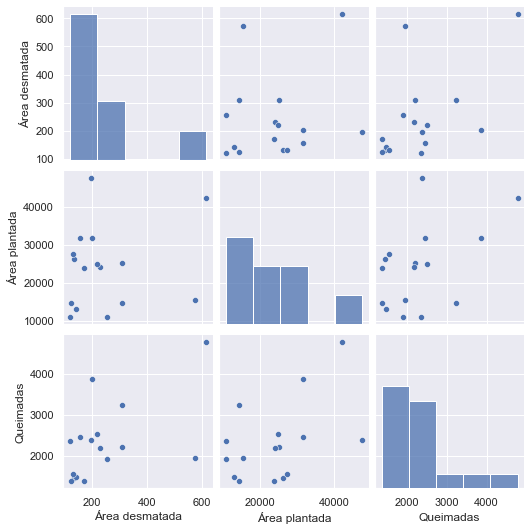

In [41]:
sns.pairplot(df_RR)

No estado de Amazonas, podemos ver que a produção de grãos permaneceu, em geral, constante durante o período analisado, enquanto a área desmatada e a área plantada diminuiram.

In [42]:
queimadas_RR = df_RR['Queimadas']
desmatada_RR = df_RR['Área desmatada']
plantada_RR = df_RR['Área plantada']
lr1_RR = ss.linregress(queimadas_RR, desmatada_RR)
lr2_RR = ss.linregress(plantada_RR, desmatada_RR)

In [43]:
r2_RR_queimadas = round(lr1_RR.rvalue**2, 3)
r2_RR_plantada = round(lr2_RR.rvalue**2, 3)
r2_RR_queimadas, r2_RR_plantada

(0.317, 0.032)

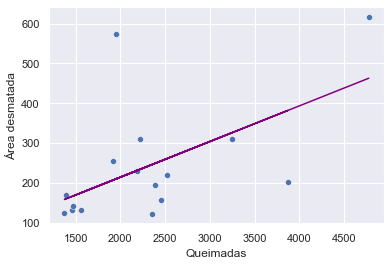

In [44]:
sns.scatterplot(x=queimadas_RR, y=desmatada_RR)
y_hat = lr1_RR.slope * queimadas_RR + lr1_RR.intercept
plt.plot(queimadas_RR, y_hat, color="purple")

In [46]:
# correlação muito baixa
# sns.scatterplot(x=plantada_RR, y=desmatada_RR)
# y_hat = lr2_RR.slope * queimadas_RR + lr2_RR.intercept
# plt.plot(plantada_RR, y_hat, color="purple")

Analisando o Maranhão (maior correlação em módulo com a área plantada):

In [29]:
df_MA = pd.DataFrame(columns=['Área desmatada', 'Área plantada', 'Queimadas'])
df_MA['Área desmatada'] = df_amazon['MA']
df_MA['Queimadas'] = df_group_fires['MA']
df_MA['Área plantada'] = df_group_area['MA']

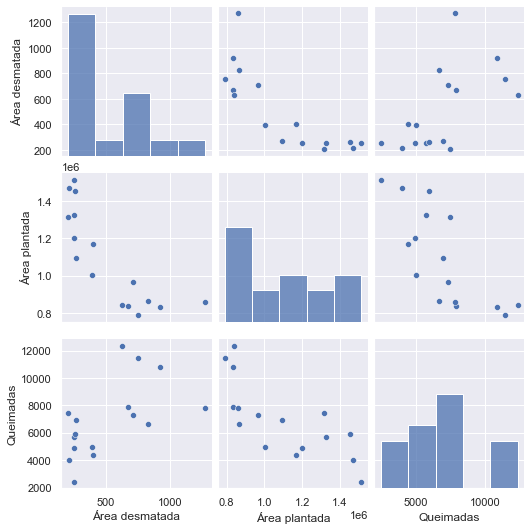

In [30]:
sns.pairplot(df_MA)

In [31]:
queimadas_MA = df_MA['Queimadas']
desmatada_MA = df_MA['Área desmatada']
plantada_MA = df_MA['Área plantada']
lr1_MA = ss.linregress(queimadas_MA, desmatada_MA)
lr2_MA = ss.linregress(plantada_MA, desmatada_MA)

In [32]:
r2_MA_queimadas = round(lr1_MA.rvalue**2, 3)
r2_MA_plantada = round(lr2_MA.rvalue**2, 3)
r2_MA_queimadas, r2_MA_plantada

(0.342, 0.656)

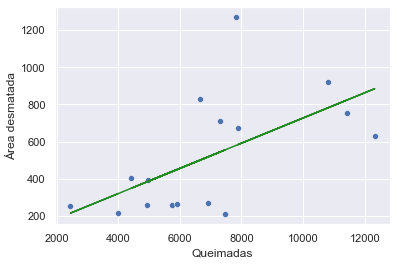

In [33]:
sns.scatterplot(x=queimadas_MA, y=desmatada_MA)
y_prod_MA = lr1_MA.slope * queimadas_MA + lr1_MA.intercept
plt.plot(queimadas_MA, y_prod_MA, color="forestgreen")

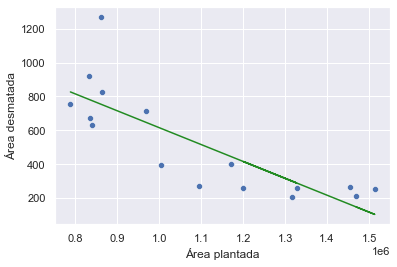

In [34]:
sns.scatterplot(x=plantada_MA, y=desmatada_MA)
y_area_MA = lr2_MA.slope * plantada_MA + lr2_MA.intercept
plt.plot(plantada_MA, y_area_MA, color="forestgreen")